In [1]:


!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install keras
!pip install tensorflow
!pip install wandb
!pip install patchify
!pip install opencv-python

  Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
patchify 0.2.3 requires numpy<2,>=1, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


In [2]:

!pip uninstall -y numpy scikit-learn patchify
!pip install --upgrade numpy scikit-learn patchify


Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
Found existing installation: scikit-learn 1.7.2
Uninstalling scikit-learn-1.7.2:
  Successfully uninstalled scikit-learn-1.7.2
Found existing installation: patchify 0.2.3
Uninstalling patchify-0.2.3:
  Successfully uninstalled patchify-0.2.3
  Using cached numpy-2.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached patchify-0.2.3-py3-none-any.whl.metadata (3.0 kB)
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.5 MB)
Using cached patchify-0.2.3-py3-none-any.whl (6.6 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
ERROR: pip's depende

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os #to access the folders
import cv2 #to read the images
from PIL import Image #for images (basically to convert the numpy array to image)
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from matplotlib import pyplot as plt
import random

In [5]:
!pip install wandb




In [6]:
import os #to access the folders
import cv2 #to read the images
from PIL import Image #for images (basically to convert the numpy array to image)
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from matplotlib import pyplot as plt
import random

In [7]:
minmaxscaler=MinMaxScaler()

In [8]:
!ls -lah '/content/drive/MyDrive/Colab Notebooks/'


total 1.3M
-rw------- 1 root root  50K Sep 15 17:34 'Copy of Satellite_Imagery_DeepLearning-LocalDiag.ipynb'
-rw------- 1 root root 421K Sep 13 18:06 'Copy of Welcome To Colab'
drwx------ 2 root root 4.0K Sep  4 13:40  datasets
-rw------- 1 root root  50K Sep 19 13:02  Satellite-Imagery-Segmentation.ipynb
-rw------- 1 root root  69K Sep 16 12:54  satellitenotebook1.ipynb
-rw------- 1 root root 671K Sep 18 17:48  Satellite_segmentation_Prediction.ipynb


In [9]:
!ls -lah '/content/drive/MyDrive/Colab Notebooks/'

total 1.3M
-rw------- 1 root root  50K Sep 15 17:34 'Copy of Satellite_Imagery_DeepLearning-LocalDiag.ipynb'
-rw------- 1 root root 421K Sep 13 18:06 'Copy of Welcome To Colab'
drwx------ 2 root root 4.0K Sep  4 13:40  datasets
-rw------- 1 root root  50K Sep 19 13:02  Satellite-Imagery-Segmentation.ipynb
-rw------- 1 root root  69K Sep 16 12:54  satellitenotebook1.ipynb
-rw------- 1 root root 671K Sep 18 17:48  Satellite_segmentation_Prediction.ipynb


In [10]:
!ls -lah '/content/drive/MyDrive/Colab Notebooks/dubai_dataset/Semantic segmentation dataset'

ls: cannot access '/content/drive/MyDrive/Colab Notebooks/dubai_dataset/Semantic segmentation dataset': No such file or directory


In [11]:
dataset_root_folder='/content/drive/MyDrive/Colab Notebooks/datasets/'

In [12]:
dataset_name="dubai_dataset"

In [13]:
for path,subdir,files in os.walk(os.path.join(dataset_root_folder,dataset_name)):
  dir_name=path.split(os.path.sep)[-1]
  # print(dir_name)
  if dir_name=="masks":#images
    images=os.listdir(path)
    #print(path)
    #print(images)
    for i,image_name in enumerate(images):
      if (image_name.endswith('.png')): #.jpg  (can also be used)
         #print(image_name)
         a=True


In [14]:
#read the images and masks
image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [15]:
image_patch_size=256

In [16]:
image.shape

(544, 509, 3)

In [17]:
image_patches=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)
#print(image_patches)

In [18]:
print(image_patches.shape)

(2, 1, 1, 256, 256, 3)


In [19]:
image_x=image_patches[0,0,:,:]
image_x
#Minmaxsacler
minmaxscaler=MinMaxScaler()
image_y=minmaxscaler.fit_transform(image_x.reshape(-1,image_x.shape[-1])).reshape(image_x.shape)


In [20]:
image_y[0].shape

(256, 256, 3)

In [21]:
# image_x=image_patches[0,0,:,:]
# minmaxscaler=MinMaxScaler()
# minmaxscaler.fit_transform(image_x.reshape(-1,image_x.shape[-1])).reshape(image_x.shape[-1])

In [22]:
(image.shape[1]//image_patch_size)*image_patch_size

256

In [23]:
print(type(image)) #so this basically numpy array not a image so we need to convert this into image

<class 'numpy.ndarray'>


In [24]:
type(Image.fromarray(image))

PIL.Image.Image

In [25]:
image_dataset=[]
mask_dataset=[]

for image_type in ['images','masks']:
  if image_type=='images':
      image_extension= 'jpg'
  elif image_type=='masks':
      image_extension='png'
  for tile_id in range(1,8):
    for image_id in range(1,20): #masks
      image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type=='masks':
          image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x=(image.shape[1]//image_patch_size)*image_patch_size
        size_y=(image.shape[0]//image_patch_size)*image_patch_size
        #print("{}------- {} - {}".format(image.shape,size_x,size_y))
        image=Image.fromarray(image) #converted the numpy array into image
        image=image.crop((0,0,size_x,size_y))
        #print("({}, {})".format(image.size[0],image.size[1]))
        image=np.array(image)
        #print(image.shape)
        patched_images=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)#to ensure each path is 256
        #print(len(patched_images))#it will give len of first patch size which is height
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type=='images':
              single_patch_image=patched_images[i,j,:,:]
              #print(single_patch_image.shape)
                #min max scaler
              single_patch_image=minmaxscaler.fit_transform(single_patch_image.reshape(-1,single_patch_image.shape[-1])).reshape(single_patch_image.shape)
              single_patch_image=single_patch_image[0]
              single_patch_image[0].shape
              #print(single_patch_image.shape)
              #print(single_patch_image)
              image_dataset.append(single_patch_image)
            elif image_type=='masks':
              single_patch_mask=patched_images[i,j,:,:]
              single_patch_mask=single_patch_mask[0]
              #print(single_patch_image.shape)
              mask_dataset.append(single_patch_mask)

In [26]:

print(len(image_dataset))
print(len(mask_dataset))


945
945


In [27]:
mask_dataset=np.array(mask_dataset)
image_dataset=np.array(image_dataset)

In [28]:
print(type(image_dataset[0]))
print(type(mask_dataset))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


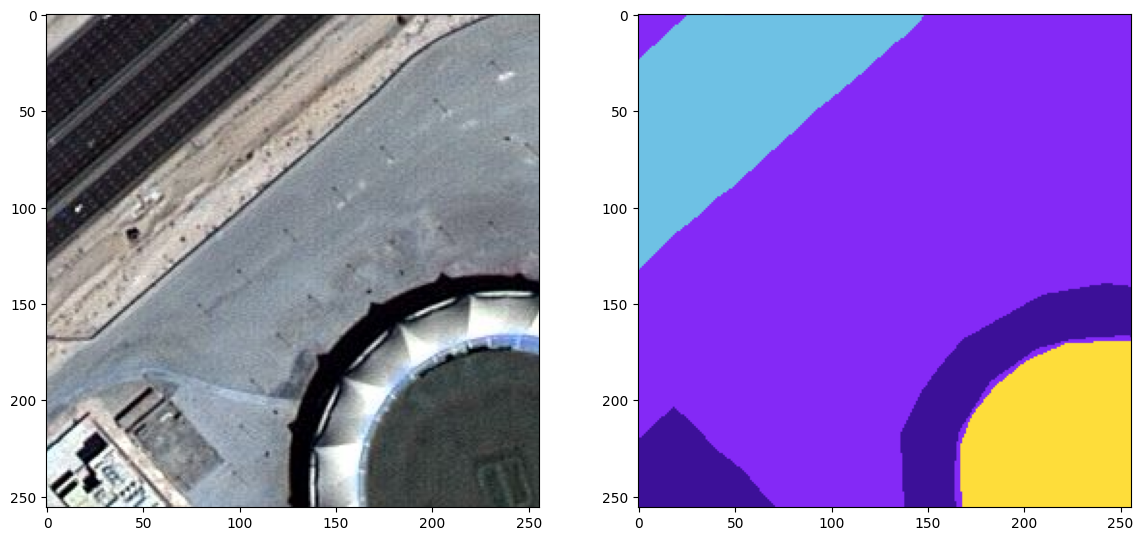

In [29]:
# the plt is used to show the image
random_image_id=random.randint(0,len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [30]:
class_building='#3C1098'
class_building=class_building.lstrip('#')
# so basically we need to seperate the number 3C1098 into 3C  10  98
class_building=np.array(tuple(int(class_building[i:i+2],16) for i in (0,2,4)))
print(class_building)

class_land='#8429F6'
class_land=class_land.lstrip('#')
# so basically we need to seperate the number 3C1098 into 3C  10  98
class_land=np.array(tuple(int(class_land[i:i+2],16) for i in (0,2,4)))
print(class_land)


class_road='#6EC1E4'
class_road=class_road.lstrip('#')
# so basically we need to seperate the number 3C1098 into 3C  10  98
class_road=np.array(tuple(int(class_road[i:i+2],16) for i in (0,2,4)))
print(class_road)

class_road='#6EC1E4'
class_road=class_road.lstrip('#')
# so basically we need to seperate the number 3C1098 into 3C  10  98
class_road=np.array(tuple(int(class_road[i:i+2],16) for i in (0,2,4)))
print(class_road)


class_vegetarian = '#FEDD3A'
class_vegetarian = class_vegetarian.lstrip('#')
class_vegetarian = np.array(tuple(int(class_vegetarian[i:i+2], 16) for i in (0, 2, 4)))
print(class_vegetarian)


class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0, 2, 4)))
print(class_water)


class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0, 2, 4)))
print(class_unlabeled)



[ 60  16 152]
[132  41 246]
[110 193 228]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [31]:
mask_dataset.shape
# 1305 → total number of patches (samples)

# 256 → patch height (pixels)

# 256 → patch width (pixels)

(945, 256, 256, 3)

In [32]:
def rgb_to_label(label):
  label_segment=np.zeros(label.shape,dtype=np.uint8)
  label_segment[np.all(label==class_water,axis=-1)]=0
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_vegetarian, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5

  label_segment=label_segment[:,:,0]
  #print(label_segment)

  return label_segment


In [33]:
labels=[]
for i in range(mask_dataset.shape[0]):
  #mask_dataset.shape contains 1305 datapoints to check with each value
  label=rgb_to_label(mask_dataset[i])
  labels.append(label)
#   labels is a list of 1305 ones:

# [1, 1, 1, ..., 1]



In [34]:
len(labels)

945

In [35]:
labels=np.array(labels)

In [36]:
#labels[3]

In [37]:
labels.shape

(945, 256, 256)

In [38]:
labels=np.expand_dims(labels,axis=3)
# np.expand_dims to add one more dimension tht is 3rd coulmn or row or dimension

In [39]:
labels[3]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [40]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

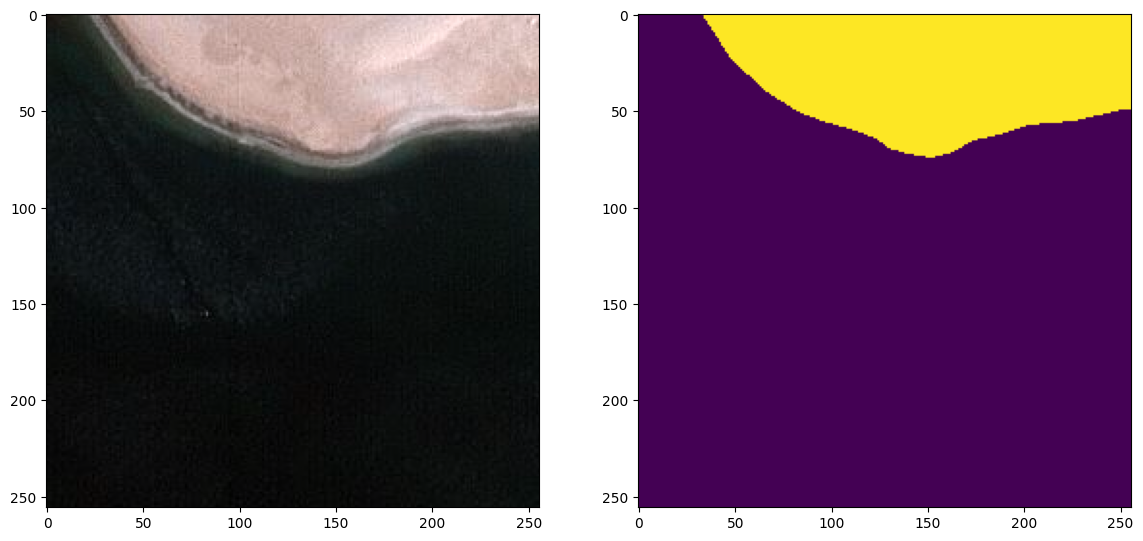

In [41]:
# the plt is used to show the image
random_image_id=random.randint(0,len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(labels[random_image_id])

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
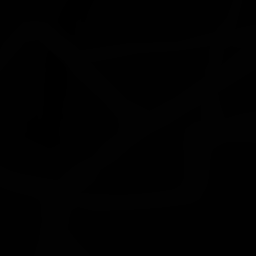

In [42]:
labels[3][:,:,0]

In [43]:
total_classes=len(np.unique(labels))

In [44]:
total_classes

6

In [45]:
!pip install tensorflow


In [46]:
from tensorflow.keras.utils import to_categorical

In [47]:
labels_categorical_dataset=to_categorical(labels,num_classes=total_classes)

In [48]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [49]:
#labels_categorical_dataset

In [50]:

master_training_dataset=image_dataset
master_training_dataset = master_training_dataset.astype('float32')


In [51]:
master_training_dataset.shape

(945, 256, 256, 3)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:

master_training_dataset = master_training_dataset.astype('float32')
labels_categorical_dataset = labels_categorical_dataset.astype('float32')

# Use smaller test size
x_train, x_test, y_train, y_test = train_test_split(
    master_training_dataset,
    labels_categorical_dataset,
    test_size=0.15,  # smaller fraction
    random_state=42
)



In [54]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [55]:

image_height=x_train.shape[1]
image_width=x_train.shape[2]
image_channels=x_train.shape[3]
totak_classes=y_train.shape[3]  #for total classes

In [56]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [57]:
from keras.models import Model
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers import concatenate,BatchNormalization,Dropout,Lambda


In [58]:
from keras import backend as K

In [59]:
def jaccard_coef(y_true,y_pred):
  y_true_flatten=K.flatten(y_true)
  y_pred_flatten=K.flatten(y_pred)
  intersection=K.sum(y_true_flatten*y_pred_flatten)
  final_coef_value=intersection/(K.sum(y_true_flatten)+K.sum(y_pred_flatten)-intersection+1.0)
  return final_coef_value


In [60]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, Dropout, concatenate

def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):
  # 5,256,256,1 is default value used
    inputs = Input((image_height, image_width, image_channels))
    source_input = inputs

    # Encoder path
    c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D(pool_size=(2,2))(c1)

    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D(pool_size=(2,2))(c2)

    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D(pool_size=(2,2))(c3)

    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D(pool_size=(2,2))(c4)

    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)
    # No max pooling here (bottom of U-Net)
    # Now output layer # MaxPooling = shrinking a photo, keeping only important pixels
    # Conv2DTranspose = zooming back in to reconstruct original size, but the network learns how to fill in missing details
    # Think of it as a smart magnifying glass that can reconstruct edges, textures, and details from compressed information
    # Decoder path
    u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
    u9 = concatenate([u9, c1], axis=3)  # axis=3 for channel concatenation
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

    # Output layer
    outputs = Conv2D(n_classes, (1,1), activation='softmax')(c9)

    model= Model(inputs=[inputs], outputs=[outputs])
    return model

In [61]:
# MODEL MATRIX
metrics=["accuracy",jaccard_coef]


In [62]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,image_height=image_height,image_width=image_width,image_channels=image_channels)


In [63]:
model=get_deep_learning_model()

In [64]:
model

<Functional name=functional, built=True>

In [65]:
#model.get_config()

In [66]:
#Loss Function

In [67]:
weights=[0.166,0.166,0.166,0.166,0.166,0.166]

In [68]:
import tensorflow as tf
from tensorflow.keras import backend as K

# Class weights (6 classes)
class_weights = tf.constant([0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666], dtype=tf.float32)

# Dice Loss
def dice_loss(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Categorical Focal Loss
def categorical_focal_loss(y_true, y_pred, gamma=2.0, alpha=0.25):
    y_pred = K.clip(y_pred, K.epsilon(), 1.0 - K.epsilon())
    cross_entropy = -y_true * K.log(y_pred)
    weight = alpha * K.pow(1 - y_pred, gamma)
    loss = weight * cross_entropy
    return K.sum(loss, axis=-1)

# Total loss (Dice + Focal)
def total_loss(y_true, y_pred):
    return dice_loss(y_true, y_pred) + categorical_focal_loss(y_true, y_pred)


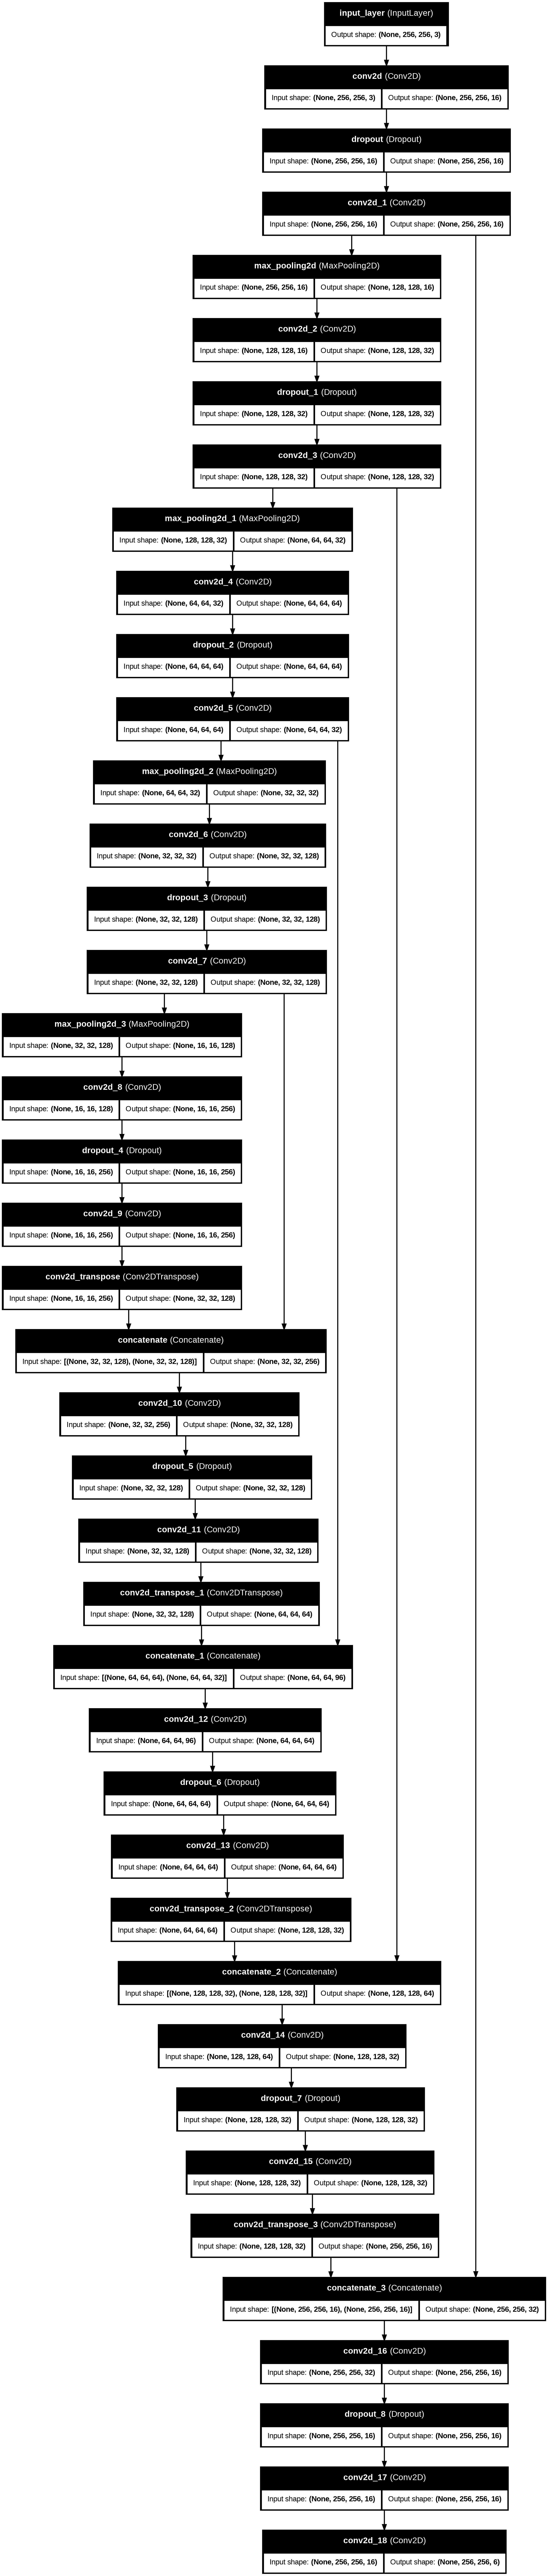

In [69]:
!pip install pydot graphviz
# Also ensure system-level graphviz installed (if needed)
# !apt-get install graphviz

from tensorflow.keras.utils import plot_model

plot_model(model, to_file="satellite_model_plot.png", show_shapes=True, show_layer_names=True)


In [70]:
import keras
from IPython.display import clear_output
%matplotlib inline

In [71]:
import keras
from IPython.display import clear_output

%matplotlib inline


class PlotLoss(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.jaccard_coef = []
    self.val_jaccard_coef = []

    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)
    # self.losses.append(logs.get('loss'))
    # self.val_losses.append(logs.get('val_loss'))

    self.jaccard_coef.append(logs.get('jaccard_coef'))
    self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

    self.i += 1

    clear_output(wait=True)
    # plt.plot(self.x, self.losses, label="loss")
    # plt.plot(self.x, self.val_losses, label="val_loss")

    plt.plot(self.x, self.jaccard_coef, label="jaccard_coef")
    plt.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")

    plt.legend()
    plt.show();

plot_loss = PlotLoss()



In [72]:
import keras
from IPython.display import clear_output

%matplotlib inline


class PlotLossEx(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
# self refers to the instance of the callback class.
# It allows the callback to store internal state across epochs (e.g., lists like self.x, self.losses, etc.).
    self.x = []
    self.losses = []
    self.val_losses = []

    self.jaccard_coef = []
    self.val_jaccard_coef = []

    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    self.jaccard_coef.append(logs.get('jaccard_coef'))
    self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

    self.i += 1

    plt.figure(figsize=(14,8))
    f, (graph1, graph2) = plt.subplots(1,2, sharex=True)

    clear_output(wait=True)

    graph1.set_yscale('log')
    graph1.plot(self.x, self.losses, label="loss")
    graph1.plot(self.x, self.val_losses, label="val_loss")
    graph1.legend()

    graph2.set_yscale('log')
    graph2.plot(self.x, self.jaccard_coef, label="jaccard_coef")
    graph2.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")
    graph2.legend()

    plt.show();

plot_loss = PlotLossEx()



In [73]:
import wandb
from wandb.integration.keras import WandbCallback, WandbMetricsLogger


In [74]:
wandb.init(project="Satellite-Segmentation-dubai-images" )

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: madeehakhanum071 (madeehakhanum071-yenepoya-deeemed-to-be-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [75]:
!wandb status

Current Settings
{
  "_extra_http_headers": null,
  "_proxies": null,
  "api_key": null,
  "base_url": "https://api.wandb.ai",
  "entity": null,
  "git_remote": "origin",
  "ignore_globs": [],
  "organization": null,
  "project": null,
  "root_dir": null,
  "section": "default"
}


In [76]:
!wandb login

wandb: Currently logged in as: madeehakhanum071 (madeehakhanum071-yenepoya-deeemed-to-be-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [77]:

from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss=total_loss, metrics=metrics)
model_history = model.fit(
    x_train,
    y_train,
    batch_size=16,
    epochs=10,
    #callbacks=[plot_loss],  # Correct argument name
   callbacks=[WandbMetricsLogger()],
    validation_data=(x_test, y_test),
    shuffle=False
)


Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 79s 750ms/step - accuracy: 0.5383 - jaccard_coef: 0.2581 - loss: 0.8529 - val_accuracy: 0.5541 - val_jaccard_coef: 0.1710 - val_loss: 0.9128
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 161ms/step - accuracy: 0.5600 - jaccard_coef: 0.3403 - loss: 0.7380 - val_accuracy: 0.5609 - val_jaccard_coef: 0.2212 - val_loss: 0.8250
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.5623 - jaccard_coef: 0.3575 - loss: 0.7038 - val_accuracy: 0.6049 - val_jaccard_coef: 0.2796 - val_loss: 0.7445
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.5761 - jaccard_coef: 0.3657 - loss: 0.6733 - val_accuracy: 0.6217 - val_jaccard_coef: 0.3013 - val_loss: 0.7155
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.5963 - jaccard_coef: 0.3728 - loss: 0.6607 - val_accuracy: 0.6335 - val_jaccard_coef: 0.3030 - val_loss: 0.7101
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.6127 - jaccard_coef: 0.3793 - loss: 0.

In [108]:
history_a=model_history

In [109]:
history_a.history

{'accuracy': [0.5580453276634216,
  0.5680060982704163,
  0.5712417960166931,
  0.5877230167388916,
  0.6070557236671448,
  0.6221127510070801,
  0.6363222599029541,
  0.667777419090271,
  0.7069426774978638,
  0.7186881899833679],
 'jaccard_coef': [0.30573225021362305,
  0.35051047801971436,
  0.3696780502796173,
  0.378817081451416,
  0.3836144506931305,
  0.38856980204582214,
  0.39326947927474976,
  0.4014233648777008,
  0.4776965379714966,
  0.5104899406433105],
 'loss': [0.7923567891120911,
  0.7228595614433289,
  0.6863402724266052,
  0.6598784923553467,
  0.6495751738548279,
  0.6405108571052551,
  0.6313799619674683,
  0.6171971559524536,
  0.5302976369857788,
  0.4937689006328583],
 'val_accuracy': [0.554064154624939,
  0.5609424114227295,
  0.6048966646194458,
  0.6217024922370911,
  0.6334589719772339,
  0.6419920325279236,
  0.6567556858062744,
  0.6886516213417053,
  0.6824491024017334,
  0.6974247694015503],
 'val_jaccard_coef': [0.171035498380661,
  0.2212226837873459,


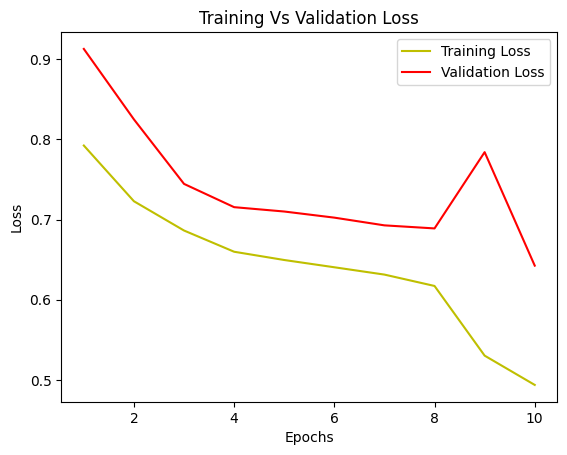

In [110]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


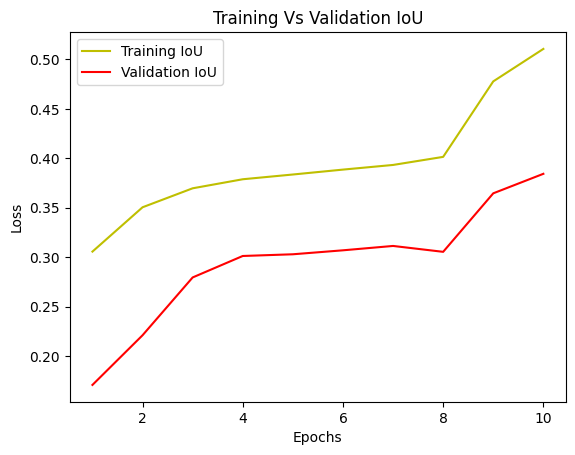

In [111]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [112]:
model_history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 51}

In [113]:
y_pred = model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


In [114]:
len(y_pred)

142

In [115]:
y_pred

array([[[[0.13173063, 0.3549381 , 0.13542067, 0.1614938 , 0.1341897 ,
          0.08222722],
         [0.11151592, 0.40961385, 0.15073673, 0.12512062, 0.13716514,
          0.0658477 ],
         [0.11221001, 0.47880784, 0.11634095, 0.12651217, 0.11981343,
          0.04631558],
         ...,
         [0.07186361, 0.4616747 , 0.20543031, 0.07928137, 0.12533344,
          0.05641652],
         [0.20952345, 0.3481516 , 0.11624218, 0.1253744 , 0.11344255,
          0.08726589],
         [0.12846659, 0.25616214, 0.19120367, 0.14273538, 0.15159342,
          0.12983888]],

        [[0.1130031 , 0.37513968, 0.15362631, 0.14959948, 0.14860128,
          0.06003016],
         [0.06466038, 0.51293147, 0.12147631, 0.15168458, 0.11745251,
          0.03179478],
         [0.08261621, 0.49832574, 0.1390748 , 0.14686926, 0.10325453,
          0.02985949],
         ...,
         [0.06714258, 0.57299453, 0.11488511, 0.10904249, 0.10565438,
          0.03028087],
         [0.09399913, 0.60299206, 0.0835

In [116]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [117]:
y_pred.shape

(142, 256, 256, 6)

In [118]:
len(y_pred_argmax)

142

In [119]:
y_pred_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 3, 1, 3]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [3, 3, 1, ..., 1, 1, 1],
        [1, 3, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 0, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 

In [120]:
y_test_argmax = np.argmax(y_test, axis=3)

In [121]:
y_test_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       ...,

       [[1, 2, 2, ..., 3, 3, 3],
        [1, 2, 2, ..., 3, 3, 3],
        [1, 2, 2, ..., 3, 3, 3],
        ...,
        [4, 4, 4, ..., 2, 2, 2],
        [4, 4, 4, ..., 2, 2, 2],
        [4, 4, 4, ..., 2, 2, 2]],

       [[1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 

In [126]:
import random
test_image_number=random.randint(0,len(x_test))
test_image=x_test[test_image_number]
ground_truth_image=y_test_argmax[test_image_number]
test_image_input=np.expand_dims(test_image,0)

prediction=model.predict(test_image_input)
predicted_image=np.argmax(prediction,axis=3)
predicted_image=predicted_image[0,:,:]
predicted_image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0, 0, 1, ..., 1, 1, 1],
       [4, 1, 1, ..., 1, 1, 1],
       [0, 3, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

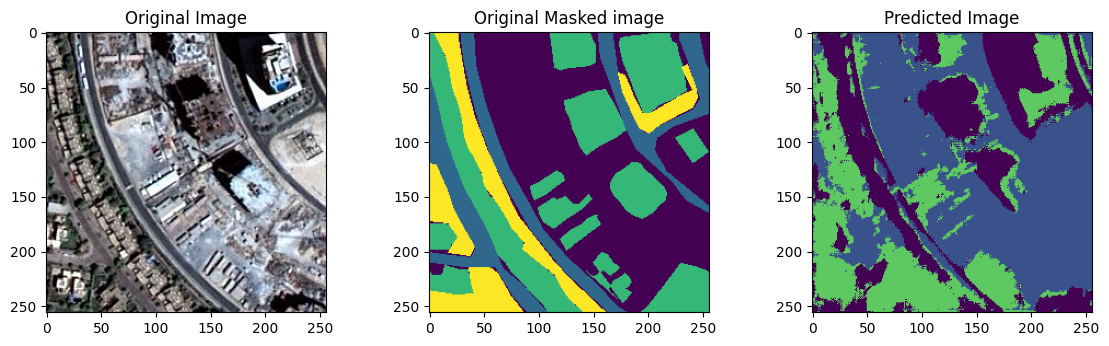

In [127]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)



In [147]:
model.save("satellite_segmentation_model.keras")

In [148]:
!ls -lah

total 23M
drwxr-xr-x 1 root root 4.0K Sep 19 13:21 .
drwxr-xr-x 1 root root 4.0K Sep 19 12:55 ..
drwxr-xr-x 4 root root 4.0K Sep 16 13:40 .config
drwx------ 5 root root 4.0K Sep 19 12:56 drive
drwxr-xr-x 2 root root 4.0K Sep 19 13:17 .ipynb_checkpoints
-rw-r--r-- 1 root root 114K Sep 19 13:13 my_image3.jpg
drwxr-xr-x 1 root root 4.0K Sep 16 13:40 sample_data
-rw-r--r-- 1 root root 1.2M Sep 19 13:05 satellite_model_plot.png
-rw-r--r-- 1 root root  22M Sep 19 13:21 satellite_segmentation_model.keras
drwxr-xr-x 3 root root 4.0K Sep 19 13:09 wandb


In [149]:
!ls /content


drive	       sample_data		 satellite_segmentation_model.keras
my_image3.jpg  satellite_model_plot.png  wandb


In [150]:
from keras.models import load_model

saved_model = load_model('/content/satellite_segmentation_model.keras',
                         custom_objects={'total_loss': total_loss,
                                         'jaccard_coef': jaccard_coef})


In [141]:
#saved_model.get_config()

Model Prediction with Custom image


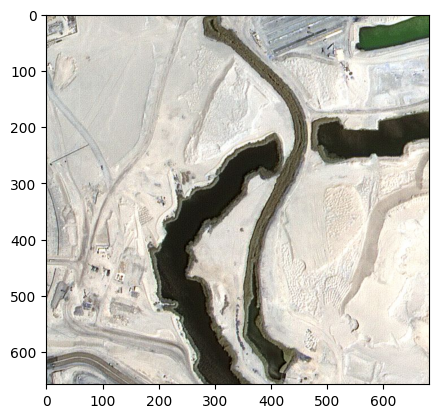

In [142]:
plt.imshow(Image.open("/content/my_image3.jpg"))

In [180]:
from PIL import Image
import numpy as np







image = Image.open('/content/my_image3.jpg')
image = image.resize((256, 256))
image = np.array(image)/ 255.0
image = np.expand_dims(image, 0)  # add batch dimension



In [181]:
prediction = saved_model.predict(image)            # shape (1,256,256,n_classes)
predicted_image = np.argmax(prediction, axis=3)[0] # shape (256,256)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Unique predicted values: [0 1 3]


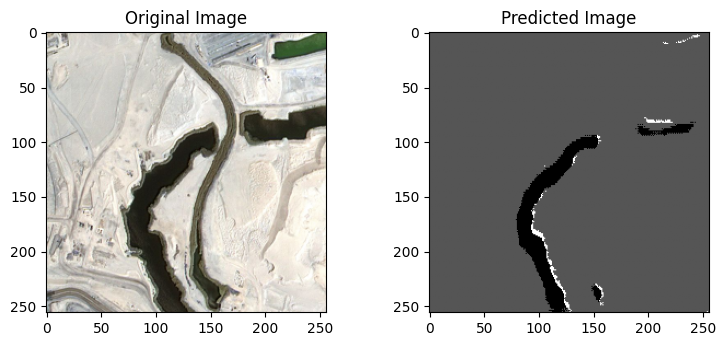

In [182]:

plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
image_to_plot = image[0]  # shape becomes (256, 256, 3)
plt.imshow(image_to_plot)
plt.subplot(232)
plt.title("Predicted Image")

plt.imshow(predicted_image,cmap="gray")
print("Unique predicted values:", np.unique(predicted_image))



In [183]:
import numpy as np

# Example class labels (you can rename based on your dataset)
class_labels = {
    0: "water",
    1: "land",
    2: "road",
    3: "building",
    4:"vegetarian",
    5:"unlabled"
}

def calculate_class_distribution(predicted_mask):
    unique, counts = np.unique(predicted_mask, return_counts=True)
    total = predicted_mask.size
    results = {}
    for u, c in zip(unique, counts):
        label = class_labels.get(u, f"Class {u}")
        results[label] = round((c / total) * 100, 2)  # percentage
    return results

# Example usage:
stats = calculate_class_distribution(predicted_image)
print("Class Distribution:", stats)


Class Distribution: {'water': 4.58, 'land': 94.84, 'building': 0.58}


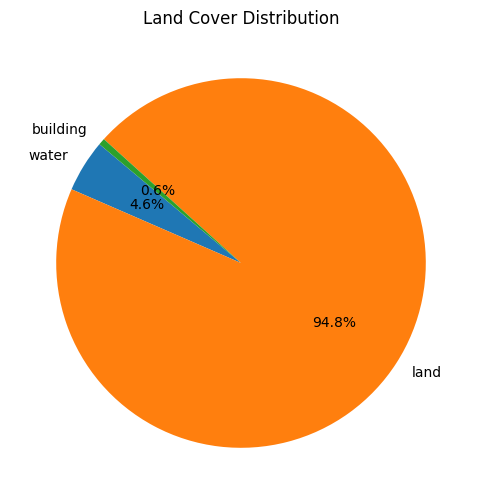

In [184]:
import matplotlib.pyplot as plt

def plot_distribution(stats):
    labels = list(stats.keys())
    values = list(stats.values())

    plt.figure(figsize=(6,6))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title("Land Cover Distribution")
    plt.show()

plot_distribution(stats)


In [104]:
#do the same for the second picture but change the name

In [105]:
!pip install keract

In [106]:
import keract as ke

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


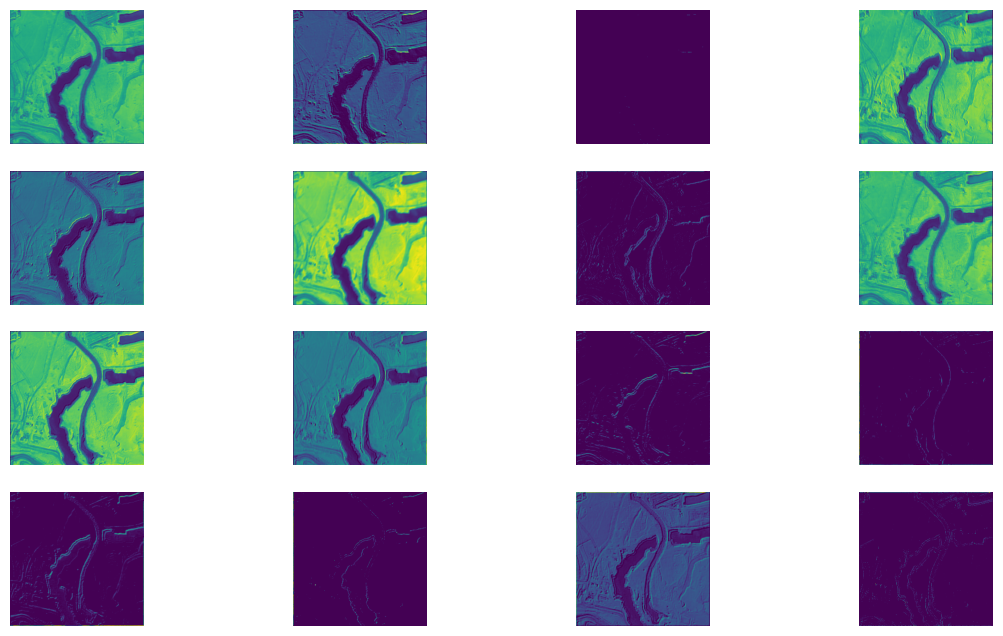

In [107]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Pick layers you want to inspect
layer_names = [layer.name for layer in saved_model.layers if 'conv' in layer.name]

# Create a new model that outputs these layers
activation_model = tf.keras.models.Model(
    inputs=saved_model.input,
    outputs=[saved_model.get_layer(name).output for name in layer_names]
)

# Get activations
activations = activation_model.predict(image)

# Visualize first conv layer
first_layer_activation = activations[0][0]  # first image
num_filters = first_layer_activation.shape[-1]

plt.figure(figsize=(14,8))
for i in range(min(num_filters, 16)):
    plt.subplot(4,4,i+1)
    plt.imshow(first_layer_activation[:,:,i], cmap='viridis')
    plt.axis('off')
plt.show()


In [185]:
#activations

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step


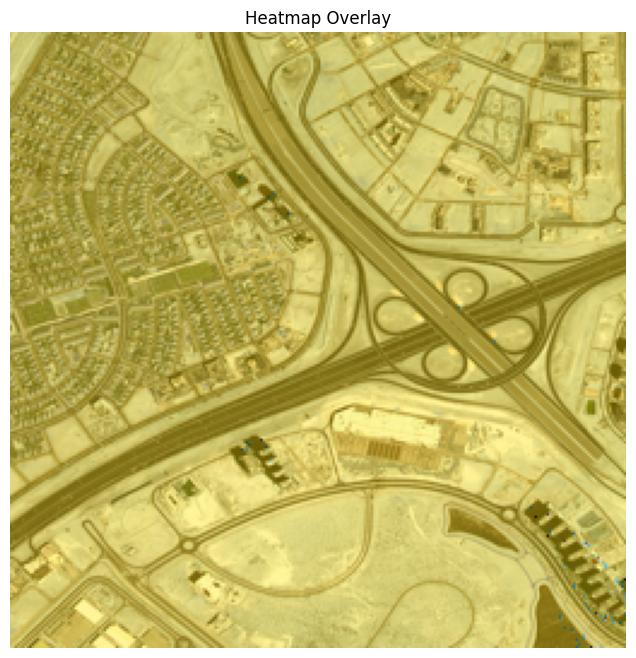

In [186]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2  # for resizing heatmap to image size

# Load and preprocess image
image = Image.open('/content/my_image1.jpg').resize((256,256))
image_array = np.array(image).astype(np.float32)
image_batch = np.expand_dims(image_array, 0)  # batch dimension

# Pick a convolutional layer (like the last conv layer)
layer_name = [layer.name for layer in saved_model.layers if 'conv' in layer.name][-1]

# Create a model that outputs that layer
activation_model = tf.keras.models.Model(
    inputs=saved_model.input,
    outputs=saved_model.get_layer(layer_name).output
)

# Get the activation map
activation = activation_model.predict(image_batch)[0]  # shape: (H, W, channels)

# Average all channels to get a single heatmap
heatmap = np.mean(activation, axis=-1)

# Normalize heatmap to [0,1]
heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))

# Resize heatmap to image size
heatmap = cv2.resize(heatmap, (image_array.shape[1], image_array.shape[0]))

# Convert to RGB heatmap
heatmap_rgb = plt.cm.jet(heatmap)[:,:,:3]  # drop alpha channel

# Overlay heatmap on original image
overlay = (0.6*image_array/255 + 0.4*heatmap_rgb)
overlay = np.clip(overlay, 0, 1)

# Display
plt.figure(figsize=(8,8))
plt.imshow(overlay)
plt.axis('off')
plt.title("Heatmap Overlay")
plt.show()
